In [33]:
#Here we consider a digits dataset where we have several digits in black and white and we have to use a classification algorithm
#to predict whether the algorithm can correctly classify the image as per the target variable
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [34]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

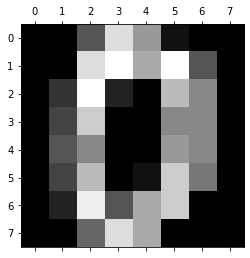

In [36]:
plt.gray()
for i in range(1):
    plt.matshow(digits.images[i])

<Figure size 432x288 with 0 Axes>

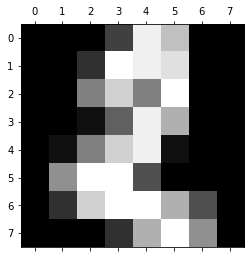

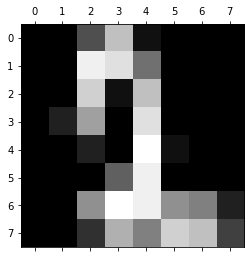

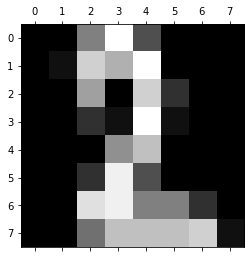

In [37]:
# this means out of the 50 images present three images have to be classified as 2 because the target variable is 2
plt.gray()
for i in range(50):
    if(digits.target[i]== 2):
        plt.matshow(digits.images[i])

In [38]:
# The image consists of pixels and in this case, each pixel is represented by a number
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [39]:
df['target'] = digits.target

In [40]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [41]:
# training and prediction of the model:
X = df.drop('target',axis='columns')
y = df.target

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [43]:
#Here we are coparing the performance of different classification algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

lr = LogisticRegression()
dt = DecisionTreeClassifier()
#n_estimators specify the number of decision trees being used by the Random Forest Algorithm
model = RandomForestClassifier(n_estimators=100)

In [44]:
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)
model.fit(X_train,y_train)

C:\Users\my\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\my\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
#showing the accuracy of each of the models
print("score of logistic regression is:",lr.score(X_test,y_test))
print("score of decision tree is:",dt.score(X_test,y_test))
print("score of logistic random forest is:",model.score(X_test,y_test))
#as we can see random forest algorithm is giving the best accuracy for this algorithm, hence it is advisable to use this algorithm.

score of logistic regression is: 0.9583333333333334
score of decision tree is: 0.8638888888888889
score of logistic random forest is: 0.9722222222222222


In [46]:
y_pred = model.predict(X_test)
y_pred

array([3, 2, 9, 7, 7, 1, 2, 2, 7, 7, 7, 1, 6, 1, 3, 0, 9, 3, 6, 4, 1, 5,
       5, 6, 5, 6, 6, 0, 9, 4, 3, 8, 1, 0, 0, 1, 1, 0, 4, 5, 9, 3, 5, 9,
       8, 6, 5, 0, 2, 3, 0, 7, 2, 7, 0, 5, 7, 4, 9, 8, 8, 6, 4, 2, 7, 8,
       4, 4, 5, 6, 6, 1, 9, 1, 9, 9, 9, 9, 5, 9, 1, 4, 6, 3, 7, 2, 5, 2,
       2, 7, 6, 6, 2, 6, 4, 2, 8, 4, 5, 4, 0, 3, 0, 0, 8, 2, 0, 4, 3, 4,
       4, 2, 4, 5, 1, 5, 1, 4, 0, 4, 5, 1, 6, 5, 7, 7, 0, 7, 8, 5, 7, 2,
       3, 4, 7, 0, 7, 0, 7, 6, 9, 1, 0, 7, 7, 6, 4, 5, 7, 9, 7, 5, 5, 8,
       3, 2, 7, 5, 4, 3, 3, 9, 8, 6, 4, 5, 5, 7, 0, 4, 2, 7, 7, 5, 6, 6,
       4, 8, 7, 7, 6, 7, 2, 7, 9, 0, 3, 7, 5, 2, 0, 0, 6, 7, 6, 5, 0, 1,
       6, 9, 7, 4, 0, 2, 0, 8, 2, 6, 6, 7, 3, 9, 0, 2, 4, 4, 0, 0, 6, 8,
       5, 2, 0, 2, 3, 1, 5, 7, 0, 7, 0, 4, 8, 0, 7, 9, 7, 9, 1, 8, 8, 1,
       0, 3, 9, 8, 7, 3, 1, 4, 2, 3, 3, 6, 8, 4, 9, 6, 9, 1, 1, 3, 1, 5,
       1, 4, 0, 6, 8, 4, 5, 5, 4, 5, 0, 6, 6, 1, 1, 7, 2, 4, 5, 1, 9, 6,
       5, 1, 2, 8, 7, 3, 4, 2, 8, 3, 3, 3, 1, 1, 9,

In [47]:
y_pred == y_test

579      True
593      True
480     False
273      True
983      True
227      True
12       True
1142     True
1501     True
963      True
1348     True
90       True
752      True
832      True
1770     True
357      True
555      True
879      True
620      True
400      True
1752     True
401      True
930      True
1245     True
373      True
16       True
532      True
552      True
1356     True
24       True
        ...  
708      True
608      True
380      True
116      True
1377     True
1605     True
770      True
1312     True
902      True
1434     True
438      True
726      True
996      True
1317     True
733      True
339      True
1731     True
421     False
26       True
101      True
1098     True
731      True
1531     True
174      True
1525     True
1707     True
1686     True
1103     True
895      True
1523     True
Name: target, Length: 360, dtype: bool

In [48]:
df.iloc[1081]

0          0.0
1          0.0
2         11.0
3         16.0
4         15.0
5          3.0
6          0.0
7          0.0
8          0.0
9          5.0
10        16.0
11        12.0
12        11.0
13        13.0
14         0.0
15         0.0
16         0.0
17         3.0
18        13.0
19         1.0
20         5.0
21        15.0
22         0.0
23         0.0
24         0.0
25         0.0
26         0.0
27         0.0
28        12.0
29        11.0
          ... 
35         1.0
36        16.0
37         7.0
38         0.0
39         0.0
40         0.0
41         0.0
42         0.0
43        10.0
44        15.0
45         0.0
46         0.0
47         0.0
48         0.0
49         0.0
50        12.0
51        16.0
52        16.0
53        11.0
54         1.0
55         0.0
56         0.0
57         0.0
58        13.0
59        13.0
60         8.0
61        13.0
62        16.0
63         8.0
target     2.0
Name: 1081, Length: 65, dtype: float64

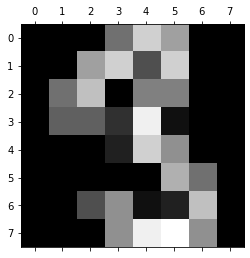

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.matshow(digits.images[579])

In [59]:
#Plotting the confusion matrix for this problem:-
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 29,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 43,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 47,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  1, 24,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 29]], dtype=int64)

Text(24.0, 0.5, 'Truth')

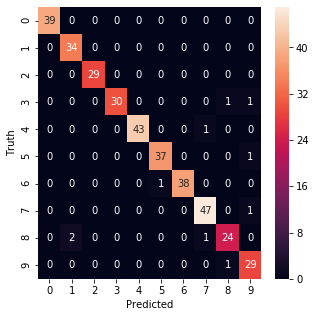

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')